In [6]:
from typing import Dict, TypedDict, List
import decimal
from langgraph.graph import StateGraph

In [3]:
class AgentState(TypedDict):
    result: str
    balance: decimal
    payments: List[decimal]
    isBill: bool
    

In [18]:
def payment_node(state:AgentState) -> AgentState:
    totalPayment = sum(state["payments"])
    if state["isBill"] is True:
        state["balance"] = state["balance"] - totalPayment
    else:
        state["balance"] = state["balance"] + totalPayment
    state["result"] = "Your updated balance is: £" + str(state["balance"]) + "."
    return state

In [19]:
graph = StateGraph(AgentState)
graph.add_node("payment_node", payment_node)
graph.set_entry_point("payment_node")
graph.set_finish_point("payment_node")
app = graph.compile()

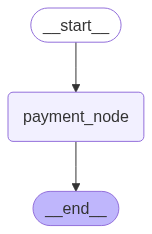

In [9]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [21]:
result = app.invoke({"balance":2500, "payments":[250, 100.50, 1000], "isBill":True})

print(result["result"])

Your updated balance is: £1149.5.
